# Explore Superfund site data

Now that I have wrangled the data into a usable format, I am going to explore further to try and pick out some intersting case studies.

In [172]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry import Polygon
from shapely.geometry import mapping
import jenkspy
import numpy as np

import warnings
warnings.simplefilter(action='ignore')

In [173]:
#change default figure size
plt.rcParams['figure.figsize'] = (20, 10)

In [197]:
#read superfund site data in
superfund_in = gpd.read_file('../data/superfund-sites.geojson')
superfund = superfund_in.copy()
superfund

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
0,AK4170024323,ADAK NAVAL AIR STATION SITE,Currently on the Final NPL,51.877500,-176.652500,ADAK,[Blank County],AK,ADAK IS,99546,...,No,Yes,Yes,None,Other,No,None,51.37,www.epa.gov/superfund/adak-nas,POINT (-176.65250 51.87750)
1,AKD004904215,ALASKA BATTERY ENTERPRISES CLEANUP,Deleted from the Final NPL,64.820300,-147.703800,FAIRBANKS,FAIRBANKS NORTH STAR,AK,157 OLD RICHARDSON HIGHWAY,99701,...,No,Yes,Yes,3/2/1993,Recycling,No,None,NaN,www.epa.gov/superfund/alaska-battery,POINT (-147.70380 64.82030)
2,AKD980983241,ALASKA RAILROAD CORP,Not on the NPL,61.222360,-149.888250,ANCHORAGE,ANCHORAGE,AK,1ST AVENUE,99501,...,No,Yes,Insufficient Data,None,Other,No,None,NaN,www.epa.gov/superfund/alaska-railroad-anchorag...,POINT (-149.88825 61.22236)
3,AKD980988158,ARCTIC SURPLUS,Deleted from the Final NPL,64.812200,-147.564300,FAIRBANKS,[Blank County],AK,BADGER RD AND OLD RICHARDSON WAY MI. 6,99701,...,Yes,Yes,Yes,4/18/2005,Waste Management,No,None,NaN,www.epa.gov/superfund/arctic-surplus,POINT (-147.56430 64.81220)
4,AK1570028646,EIELSON AIR FORCE BASE,Currently on the Final NPL,64.671450,-147.049200,FAIRBANKS,FAIRBANKS NORTH STAR,AK,HIGHWAY 2 - 16 MI SE OF FAIRBANKS,99702,...,No,Yes,Insufficient Data,9/30/1998,Waste Management,No,None,48.14,www.epa.gov/superfund/eielson-afb,POINT (-147.04920 64.67145)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,PAD980537773,WILLIAM DICK LAGOONS,Currently on the Final NPL,40.041939,-75.898061,WEST CALN TOWNSHIP,CHESTER,PA,TELEGRAPH ROAD,19376,...,No,Yes,No,None,Waste Management,No,None,36.64,www.epa.gov/superfund/williamdicklagoons,POINT (-75.89806 40.04194)
1466,PAD980830715,YORK COUNTY SOLID WASTE AND REFUSE AUTHORITY L...,Deleted from the Final NPL,39.782361,-76.607219,HOPEWELL TOWNSHIP,YORK,PA,ROAD #3 - BOX 426,17363,...,Yes,Yes,Yes,9/29/1995,Waste Management,No,None,NaN,www.epa.gov/superfund/yorkcountysolidwasteandr...,POINT (-76.60722 39.78236)
1467,PAD002395887,ZINC CORPORATION OF AMERICA,Currently on the Final NPL,40.808331,-75.583339,PALMERTON,CARBON,PA,211 FRANKLIN ST,18071,...,No,Yes,No,None,Waste Management,No,None,42.93,www.epa.gov/superfund/palmerton,POINT (-75.58334 40.80833)
1468,PRN000204694,ATLANTIC FLEET WEAPONS TRAINING AREA,Currently on the Final NPL,18.130580,-65.310600,VIEQUES,VIEQUES,PR,Postal Address is unavailable for the Site,00765,...,No,No,Insufficient Data,None,Other,No,None,NaN,www.epa.gov/superfund/vieques,POINT (-65.31060 18.13058)


In [198]:
# review available attributes
list(superfund.columns)

['SEMS_EPA_ID',
 'SITE_NAME',
 'NPL_STATUS_x',
 'LATITUDE',
 'LONGITUDE',
 'CITY',
 'COUNTY',
 'STATE',
 'STREET_ADDRESS',
 'ZIP_CODE',
 'REGION',
 'NPL_STATUS_y',
 'SUPERFUND_ALTERNATIVE_APPROACH',
 'SITE_WIDE_READY_FOR_ANTICIPATED_USE',
 'HUMAN_EXPOSURE_UNDER_CONTROL',
 'GROUNDWATER_MIGRATION_UNDER_CONTROL',
 'CONSTRUCTION_COMPLETION_DATE',
 'SITE_TYPE',
 'NATIVE_AMERICAN_INTEREST',
 'INDIAN_ENTITY',
 'HRS_SCORE',
 'SUPERFUND_SITE_PROFILE_PAGE_URL',
 'geometry']

Besides exploring the general distribution/location of Superfund sites, I'd also like to explore HRS (hazard ranking system) score and native american interest/indian entity. The other attributes describing the site location and site profile page URL can possibly be used in a popup in the final map. 

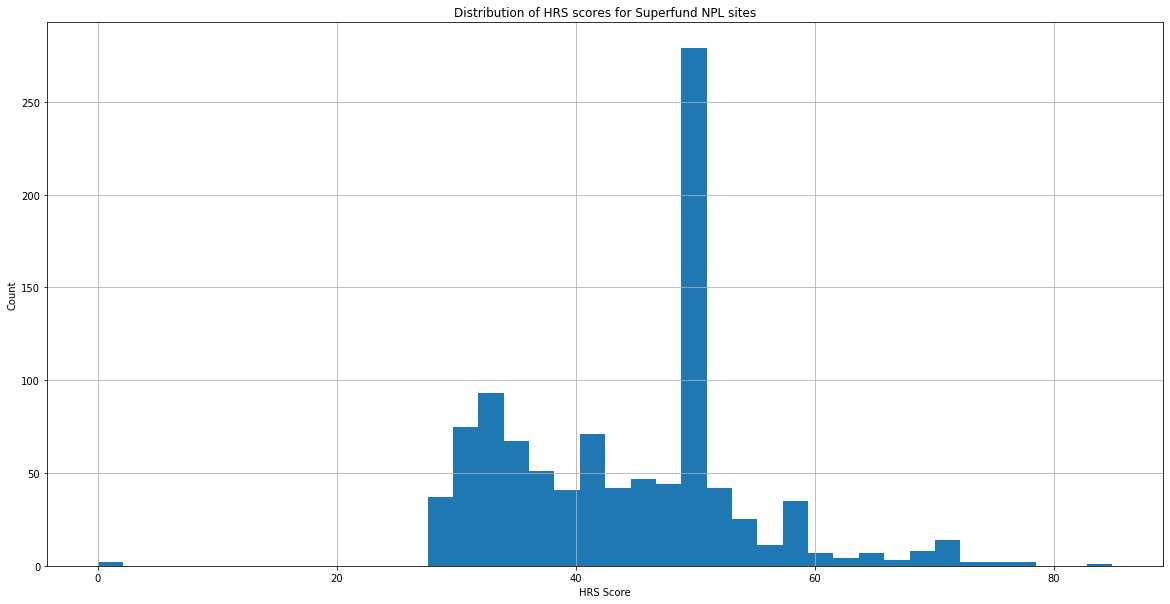

In [199]:
# plot historgram of HRS scores to view distrbution
plot = superfund['HRS_SCORE'].hist(bins=40)
plot.set(xlabel='HRS Score', ylabel='Count', title='Distribution of HRS scores for Superfund NPL sites');

In [200]:
# view HRS score descriptive statistics
superfund['HRS_SCORE'].describe()

count    1012.000000
mean       44.362609
std         9.982082
min         0.000000
25%        35.570000
50%        45.965000
75%        50.000000
max        84.910000
Name: HRS_SCORE, dtype: float64

I already know that to be eligible for the NPL a site must have a HRS score of at least 28.5. The minimum score is 0, this must be sites that had null values for the HRS column. The majority of superfund sites on the NPL have a score of around 50, 75% of sites have a score of of 50 and below. Only 25% of sites on the NPL have a score above 50. There are some sites that really stand out as having a higher HRS score than others, it looks like maybe only one has a score above 80, at the max score of 84.91.

In [178]:
# view top 5 sites with highest HRS score
high_scores = superfund.sort_values(by=['HRS_SCORE'], ascending=False)
high_scores.head()

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
804,MOD981126899,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,Currently on the Final NPL,37.878097,-90.539344,DESLOGE,ST. FRANCOIS,MO,SECTION 25 26 35 & 36 T37N R4E,63601,...,No,No,Not a Groundwater Site,None,Waste Management,No,None,84.91,www.epa.gov/superfund/bigrivermine,POINT (-90.53934 37.87810)
837,MON000705032,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,38.166150,-90.814264,RICHWOODS,WASHINGTON,MO,21 ACRES IN NORTHEAST WASHINGTON COUNTY,63071,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyrichwoods,POINT (-90.81426 38.16615)
835,MON000705027,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,38.075278,-90.738333,OLD MINES,WASHINGTON,MO,INTERSECTION OF HIGHWAYS 21 AND 47,63630,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyoldmines,POINT (-90.73833 38.07528)
1031,NJD980505416,LIPARI LANDFILL,Currently on the Final NPL,39.720281,-75.141939,PITMAN,GLOUCESTER,NJ,RT 322,08071,...,No,Yes,Yes,9/26/2018,Waste Management,No,None,75.60,www.epa.gov/superfund/lipari,POINT (-75.14194 39.72028)
111,CAD009106527,MCCORMICK & BAXTER CREOSOTING,Currently on the Final NPL,37.947851,-121.306635,STOCKTON,SAN JOAQUIN,CA,1214 W WASHINGTON ST,95203,...,No,Yes,Yes,None,Manufacturing/Processing/Maintenance,No,None,74.86,www.epa.gov/superfund/mccormick-baxter,POINT (-121.30663 37.94785)


## Missouri's Old Lead Belt

The top three sites with the highest HRS score are located in Missouri, two of which are in the same county. I can see that the two in the same county are both part of Washington County Lead District. After inspecting these sites further in QGIS, I found this area is known as Missouri's Old Lead Belt and that it contains seven Superfund sites. I also discovered that the true area encompassed by a Superfund site is often much larger than a single point location. The seven superfund sites in Missouri's Old Lead Belt cover four entire counties: Washington, Jefferson, St. Francois, and Madison. I already know that three of these sites have the highest hazard ranking scores out of any in the US. I want to see where the other four rank.

In [179]:
# filter columns for easier viewing of HRS score rankings
# view top 20 scores
high_scores.filter(['SITE_NAME', 'COUNTY', 'STATE', 'HRS_SCORE']).head(20)

,SITE_NAME,COUNTY,STATE,HRS_SCORE
804,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,ST. FRANCOIS,MO,84.91
837,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,WASHINGTON,MO,76.81
835,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,WASHINGTON,MO,76.81
1031,LIPARI LANDFILL,GLOUCESTER,NJ,75.60
111,MCCORMICK & BAXTER CREOSOTING,SAN JOAQUIN,CA,74.86
1009,HELEN KRAMER LANDFILL,GLOUCESTER,NJ,72.66
598,INDUSTRIPLEX NPL SITE,MIDDLESEX,MA,72.42
1336,PACIFIC WOOD PRESERVING OF OREGON,YAMHILL,OR,71.78
151,STOKER CHEMICAL COMPANY (1),IMPERIAL,CA,70.94
355,JOINT BASE PEARL HARBOR-HICKAM HAWAII,HONOLULU,HI,70.82


Another of Missouri's Old Lead Belt sites is in the top 20 sites, Southwest Jefferson County Mining. It has a score of 70.71 which is shared by ten of the top twenty sites. Now I want to filter just the sites in Missouri's Old Lead Belt to see what their scores are.

In [180]:
# select sites in Missouri's Old Lead Belt and sort descending by HRS score
# MINKER/STOUT/ROMAINE CREEK is not part of Missouri's Old Lead Belt
MO = superfund.loc[(superfund['STATE'] == 'MO')]
MO = MO.loc[(MO['COUNTY'] == 'ST. FRANCOIS') | (MO['COUNTY'] == 'WASHINGTON') | (MO['COUNTY'] == 'MADISON') | (MO['COUNTY'] == 'JEFFERSON')]
MO

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
802,MOD098633415,ANSCHUTZ - MADISON MINE,Currently on the Final NPL,37.546111,-90.276111,FREDERICKTOWN,MADISON,MO,401 N MINE LAMOTTE ST,63645,...,No,No,Insufficient Data,None,Mining,No,None,58.41,www.epa.gov/superfund/madisoncountymines,POINT (-90.27611 37.54611)
804,MOD981126899,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,Currently on the Final NPL,37.878097,-90.539344,DESLOGE,ST. FRANCOIS,MO,SECTION 25 26 35 & 36 T37N R4E,63601,...,No,No,Not a Groundwater Site,None,Waste Management,No,None,84.91,www.epa.gov/superfund/bigrivermine,POINT (-90.53934 37.87810)
813,MOD980741912,MINKER/STOUT/ROMAINE CREEK,Currently on the Final NPL,38.440000,-90.480000,IMPERIAL,JEFFERSON,MO,4037 W ROCK CREEK RD & SWALLER,63052,...,Yes,Yes,Not a Groundwater Site,9/30/1997,Other,No,None,36.78,www.epa.gov/superfund/minkerstoutromainecreek,POINT (-90.48000 38.44000)
826,MON000705443,SOUTHWEST JEFFERSON COUNTY MINING,Currently on the Final NPL,38.186794,-90.758975,JEFFERSON COUNTY,JEFFERSON,MO,"SLVR LK TRL & THNDR RDG RD,.5M W HWY WW",63023,...,No,No,No,None,Mining,No,None,70.71,www.epa.gov/superfund/southwestjeffersoncounty...,POINT (-90.75898 38.18679)
834,MON000705842,WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK,Currently on the Final NPL,37.840531,-90.799556,CALEDONIA,WASHINGTON,MO,2 MI. N OF INT. OF BIG RIVER & HWY 21,63631,...,No,No,Insufficient Data,None,"Manufacturing/Processing/Maintenance, Mining, ...",No,None,50.00,www.epa.gov/superfund/washingtoncountyfurnacec...,POINT (-90.79956 37.84053)
835,MON000705027,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,38.075278,-90.738333,OLD MINES,WASHINGTON,MO,INTERSECTION OF HIGHWAYS 21 AND 47,63630,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyoldmines,POINT (-90.73833 38.07528)
836,MON000705023,WASHINGTON COUNTY LEAD DISTRICT - POTOSI,Currently on the Final NPL,37.939900,-90.772400,POTOSI,WASHINGTON,MO,500 FT EAST OF BELL ST AND VALLEY ROAD,63664,...,No,No,Insufficient Data,None,Mining,No,None,50.00,www.epa.gov/superfund/washingtoncountypotosi,POINT (-90.77240 37.93990)
837,MON000705032,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,38.166150,-90.814264,RICHWOODS,WASHINGTON,MO,21 ACRES IN NORTHEAST WASHINGTON COUNTY,63071,...,No,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyrichwoods,POINT (-90.81426 38.16615)


So all seven of the Superfund sites in Missouri's Old Lead Belt have an HRS score of 50 and above, putting all seven in the 75th percentile.

I would like to explore this case study in the final map. The map could first show all counties affected, and then guide the user through each site/county with specifics. _Look at census data/CDC SVI tracts/TRI facilities in this area?_

1. BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.
2. WASHINGTON COUNTY LEAD DISTRICT - OLD MINES
3. WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS
4. SOUTHWEST JEFFERSON COUNTY MINING: this site encompasses the entire county because mining waste has been transported by the Big River and manually relocated to other areas throughout the county.
5. ANSCHUTZ - MADISON MINE
6. WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK
7. WASHINGTON COUNTY LEAD DISTRICT - POTOSI

## Superfund sites on tribal land

The exploration below attempts to learn if Native Americans are disproportionately exposed to higher risk Superfund sites.

US Government Accountability Office found that the EPA should improve the reliability of data on NPL sites affecting Indian Tribes ([source](https://www.gao.gov/assets/700/696566.pdf)).

NATIVE_AMERICAN_INTEREST indicates sites where tribal members or tribal land would be directly affected by the release of hazardous substances.

In [181]:
# filter superfund sites to see which ones are of interest to native americans
tribe = superfund.loc[(superfund['NATIVE_AMERICAN_INTEREST'] == 'Yes')]
tribe

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
6,AK0001897602,SALT CHUCK MINE,Currently on the Final NPL,55.626442,-132.558853,THORNE BAY,[Blank County],AK,"4 MI SW CY, T72S R84E S17, COPPER RIVER",99919,...,No,Yes,Yes,None,Mining,Yes,Organized Village of Kasaan,50.00,www.epa.gov/superfund/salt-chuck-mine,POINT (-132.55885 55.62644)
46,AZD094524097,CYPRUS TOHONO COPPER MINE,Not on the NPL,32.528611,-111.916111,CASA GRANDE,PINAL,AZ,INDIAN ROAD NUMBER 15,,...,No,Yes,Insufficient Data,None,Mining,Yes,Tohono O'odham Nation of Arizona,NaN,www.epa.gov/superfund/cyprustohono,POINT (-111.91611 32.52861)
53,AZD980737530,TUCSON INTERNATIONAL AIRPORT AREA,Currently on the Final NPL,32.105561,-110.933300,TUCSON,PIMA,AZ,NOGALES HWY,85734,...,No,Yes,No,None,Manufacturing/Processing/Maintenance,Yes,Tohono O'odham Nation of Arizona,57.80,www.epa.gov/superfund/tucsonairport,POINT (-110.93330 32.10556)
70,CAD980638860,CELTOR CHEMICAL WORKS,Deleted from the Final NPL,41.102700,-123.691100,HOOPA,HUMBOLDT,CA,BETW NORTON FLD & TRINITY RIV,95546,...,Yes,Yes,Not a Groundwater Site,9/29/1989,Recycling,Yes,"Hoopa Valley Tribe, California",NaN,www.epa.gov/superfund/celtorchemical,POINT (-123.69110 41.10270)
74,CAD980638225,COPPER BLUFF MINE,Currently on the Final NPL,41.109972,-123.686000,HOOPA,HUMBOLDT,CA,"OFF HIGHWAY 96, APPROXIMATELY 0.9 MILE",95546,...,No,No,Not yet designated,None,"Mining, Other",Yes,"Hoopa Valley Tribe, California",50.00,www.epa.gov/superfund/copper-bluff-mine,POINT (-123.68600 41.10997)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,ORD095003687,GOULD,Deleted from the Final NPL,45.569200,-122.748300,PORTLAND,MULTNOMAH,OR,5909 NW 61ST AV,97208,...,Yes,Yes,Yes,9/28/2000,Recycling,Yes,Confederated Tribes and Bands of the Yakama Na...,NaN,www.epa.gov/superfund/gould,POINT (-122.74830 45.56920)
1332,ORD009020603,MCCORMICK AND BAXTER CREOSOTING SUPERFUND SITE,Currently on the Final NPL,45.579443,-122.739440,PORTLAND,MULTNOMAH,OR,6900 N EDGEWATER ROAD,97203,...,No,Yes,Yes,9/27/2005,Manufacturing/Processing/Maintenance,Yes,Confederated Tribes and Bands of the Yakama Na...,50.00,www.epa.gov/superfund/mccormick-baxter-portland,POINT (-122.73944 45.57944)
1333,ORN001002476,NORTH RIDGE ESTATES,Currently on the Final NPL,42.264800,-121.746500,KLAMATH FALLS,KLAMATH,OR,OLD FORT ROAD AND NORTH RIDGE DRIVE,97601,...,No,No,Not a Groundwater Site,None,Waste Management,Yes,Klamath Tribes,0.00,www.epa.gov/superfund/north-ridge-estates,POINT (-121.74650 42.26480)
1336,ORD009042532,PACIFIC WOOD PRESERVING OF OREGON,Currently on the Final NPL,45.097222,-123.426944,SHERIDAN,YAMHILL,OR,22125 SOUTHWEST ROCK CREEK ROAD,97378,...,Yes,Yes,Yes,9/24/2008,Manufacturing/Processing/Maintenance,Yes,Confederated Tribes of the Grand Ronde Communi...,71.78,www.epa.gov/superfund/taylor-lumber,POINT (-123.42694 45.09722)


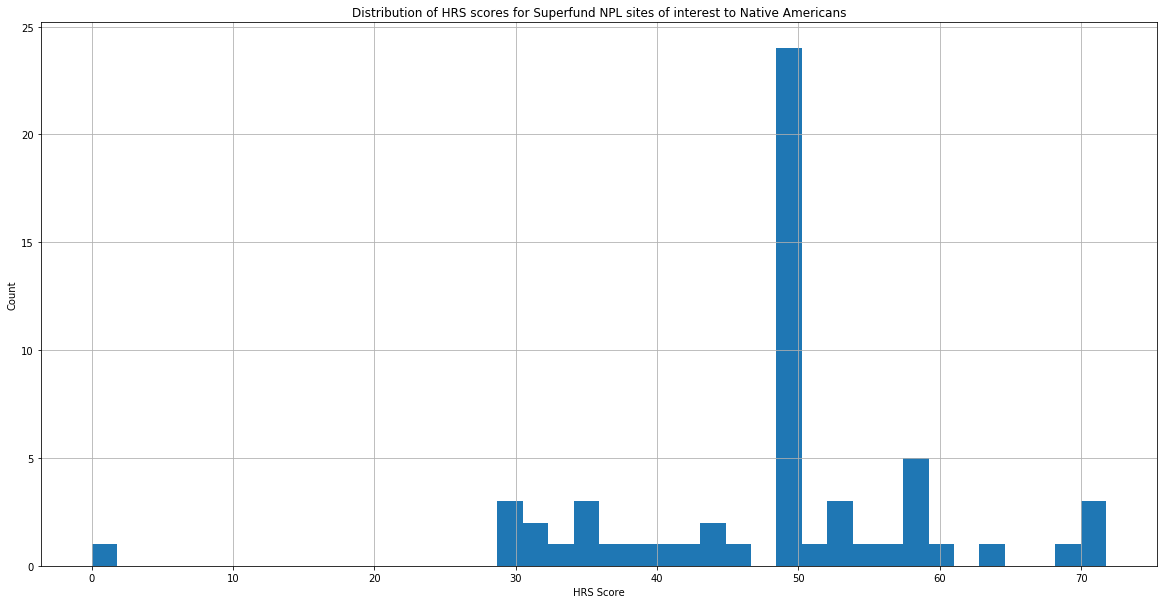

In [182]:
# plot historgram of HRS scores on tribal lands to view distrbution
plot = tribe['HRS_SCORE'].hist(bins=40)
plot.set(xlabel='HRS Score', ylabel='Count', title='Distribution of HRS scores for Superfund NPL sites of interest to Native Americans');

In [183]:
# view descriptive statistics for HRS scores on tribal lands
tribe['HRS_SCORE'].describe()

count    58.000000
mean     48.291724
std      11.906130
min       0.000000
25%      43.940000
50%      50.000000
75%      52.507500
max      71.780000
Name: HRS_SCORE, dtype: float64

According to the filtered subset above, there are 75 Superfund sites that are of interest to Native Americans. So out of the 1470 Superfund sites on the NPL in the US, only 5.1%  are of interest to Native Americans. 

But out of all the sites in the US, any HRS score above 50 puts the site in the 75th percentile. Out of the 5.1% of sites of interest to Native Americans, 50% of these have a score above 50, putting them in the 75th percentile for HRS scores.

Now I will try to find a specific case study or two here to explore.

In [184]:
# view tribal sites by descending HRS score
tribe.sort_values(by=['HRS_SCORE'], ascending=False)

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
1336,ORD009042532,PACIFIC WOOD PRESERVING OF OREGON,Currently on the Final NPL,45.097222,-123.426944,SHERIDAN,YAMHILL,OR,22125 SOUTHWEST ROCK CREEK ROAD,97378,...,Yes,Yes,Yes,9/24/2008,Manufacturing/Processing/Maintenance,Yes,Confederated Tribes of the Grand Ronde Communi...,71.78,www.epa.gov/superfund/taylor-lumber,POINT (-123.42694 45.09722)
877,NCSFN0406989,BARBER ORCHARD,Currently on the Final NPL,35.445833,-83.063889,WAYNESVILLE,HAYWOOD,NC,U.S. HIGHWAY 23/74,28786,...,Yes,Yes,Yes,9/29/2011,Other,Yes,Eastern Band of Cherokee Indians,70.71,www.epa.gov/superfund/barber-orchard,POINT (-83.06389 35.44583)
592,MAD002084093,GE PITTSFIELD HOUSATONIC RIVER SUPERFUND SITE,Proposed for NPL,42.450278,-73.232222,PITTSFIELD,BERKSHIRE,MA,"BETWEEN PITTSFIELD AND LENOX, MA",01201,...,No,No,No,None,Manufacturing/Processing/Maintenance,Yes,Mashantucket Pequot Indian Tribe; Mashpee Wamp...,70.71,www.epa.gov/superfund/ge,POINT (-73.23222 42.45028)
856,MTD057561763,ANACONDA ALUMINUM CO COLUMBIA FALLS REDUCTION ...,Currently on the Final NPL,48.391660,-114.136514,COLUMBIA FALLS,FLATHEAD,MT,EASTERN END OF ALUMINUM DRIVE,59912,...,No,Insufficient Data,Insufficient Data,None,Manufacturing/Processing/Maintenance,Yes,Confederated Salish and Kootenai Tribes of the...,68.39,www.epa.gov/superfund/columbia-falls,POINT (-114.13651 48.39166)
871,MTD980502777,SILVER BOW CREEK/BUTTE AREA,Currently on the Final NPL,46.002307,-112.616980,BUTTE,[Blank County],MT,BUTTE TO MILLTOWN RESERVIOR,59750,...,No,Insufficient Data,Yes,None,Waste Management,Yes,Confederated Salish and Kootenai Tribes of the...,63.76,www.epa.gov/superfund/silver-bow-butte,POINT (-112.61698 46.00231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,NYD000831644,HOOKER (HYDE PARK),Deleted from the Final NPL,43.131111,-79.036669,NIAGARA FALLS,NIAGARA,NY,HYDE PARK BLVD,14304,...,Yes,Yes,Yes,7/18/2003,Waste Management,Yes,Seneca Nation of Indians,NaN,www.epa.gov/superfund/hooker-hyde-park,POINT (-79.03667 43.13111)
1219,NYD980530265,PETER COOPER,Deleted from the Final NPL,42.458778,-78.927583,GOWANDA,CATTARAUGUS,NY,PALMER STREET,14070,...,Yes,Yes,Yes,9/17/2010,Manufacturing/Processing/Maintenance,Yes,Seneca Nation of Indians,NaN,www.epa.gov/superfund/peter-cooper,POINT (-78.92758 42.45878)
1241,NY0213820830,U S SENECA ARMY DEPOT,Currently on the Final NPL,42.750000,-76.854450,ROMULUS,SENECA,NY,FAYETTE RD,14541,...,No,Yes,Yes,None,Waste Management,Yes,Cayuga Nation,NaN,www.epa.gov/superfund/seneca-army-depot,POINT (-76.85445 42.75000)
1327,ORD071803985,ECOLUBE RECOVERY,Deleted from the Final NPL,45.606389,-122.691389,PORTLAND,MULTNOMAH,OR,AKA CHEMPRO OF OREGON INC,97217,...,Yes,Yes,Yes,8/5/2013,"Manufacturing/Processing/Maintenance, Recycling",Yes,Confederated Tribes and Bands of the Yakama Na...,NaN,www.epa.gov/superfund/harbor-oil,POINT (-122.69139 45.60639)


A quick search on the third site on this list, the GE Pittsfield Housatonic River Superfund Site, turns up a lot of information. From 1932 through 1977 at this site, General Electric manufactured and serviced electrical transformers containing PCBs. Years of PCB and industrial chemical use, and improper disposal, led to extensive contamination around Pittsfield, MA as well as down the entire length of the Housatonic River through Connecticut to the Long Island Sound. This could be another interesting case study to show how much toxins can spread and how vast the clean-up efforts can be.

In [185]:
# tribe = tribe[tribe['INDIAN_ENTITY'].notna()]
# tribe

In [142]:
# tribes = tribe['INDIAN_ENTITY'].tolist()
# tribes

In [143]:
# all_tribes = []

# for tribe in tribes:
#     split = tribe.split(';')
#     all_tribes.append(split)

# all_tribes

In [144]:
# pieces = [i for i in all_tribes for i in i]
# pieces

In [145]:
# pieces = [i for i in all_tribes for i in i]
# pieces

# all_tribes = []

# for piece in pieces:
#     stripped = piece.strip()
#     all_tribes.append(stripped)

# all_tribes

In [146]:
# from collections import Counter
# count = Counter(all_tribes)
# count.most_common()

## Add fields to filter by when creating map

In [186]:
exposure = superfund.loc[(superfund['HUMAN_EXPOSURE_UNDER_CONTROL'] == 'No') | (superfund['HUMAN_EXPOSURE_UNDER_CONTROL'] == 'Insufficient Data')]
exposure.sort_values(by='HRS_SCORE')

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
1333,ORN001002476,NORTH RIDGE ESTATES,Currently on the Final NPL,42.264800,-121.746500,KLAMATH FALLS,KLAMATH,OR,OLD FORT ROAD AND NORTH RIDGE DRIVE,97601,...,No,No,Not a Groundwater Site,None,Waste Management,Yes,Klamath Tribes,0.00,www.epa.gov/superfund/north-ridge-estates,POINT (-121.74650 42.26480)
1002,NJN000206317,GARFIELD GROUND WATER CONTAMINATION,Currently on the Final NPL,40.871858,-74.106431,GARFIELD,BERGEN,NJ,WILLARD STREET AND PIERRE AVENUE,07026,...,No,Insufficient Data,Insufficient Data,None,Other,No,None,0.00,www.epa.gov/superfund/garfield-groundwater,POINT (-74.10643 40.87186)
664,MID006522791,ADAMS PLATING,Currently on the Final NPL,42.739439,-84.587781,LANSING,INGHAM,MI,521 NORTH ROSEMARY,48917,...,No,Insufficient Data,Yes,9/30/1994,Manufacturing/Processing/Maintenance,No,None,29.64,www.epa.gov/superfund/adams-plating,POINT (-84.58778 42.73944)
130,CAD009205097,RAYTHEON COMPANY,Currently on the Final NPL,37.397500,-122.053300,MOUNTAIN VIEW,SANTA CLARA,CA,350 ELLIS ST,94043,...,No,Insufficient Data,No,8/24/1999,Manufacturing/Processing/Maintenance,No,None,29.76,www.epa.gov/superfund/raytheon,POINT (-122.05330 37.39750)
91,CAD061620217,INTEL CORPORATION,Currently on the Final NPL,37.396200,-122.056600,MOUNTAIN VIEW,SANTA CLARA,CA,365 E MIDDLEFIELD RD,94040,...,No,Insufficient Data,No,8/24/1999,Manufacturing/Processing/Maintenance,No,None,29.76,www.epa.gov/superfund/intelmountainview,POINT (-122.05660 37.39620)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,MID980794531,GRATIOT COUNTY GOLF COURSE,Deleted from the Final NPL,43.416419,-84.623469,ST. LOUIS,GRATIOT,MI,EDGEWOOD GOLF COURSE,48880,...,No,No,No,9/8/1983,Waste Management,No,None,NaN,www.epa.gov/superfund/velsicol-burnpit,POINT (-84.62347 43.41642)
744,MID980994354,"TITTABAWASSEE RIVER, SAGINAW RIVER & BAY",Not on the NPL,43.618333,-84.231667,MIDLAND,MIDLAND,MI,DOW DAM TO SAGINAW RIVER,48640,...,No,No,Not a Groundwater Site,None,Other,No,None,NaN,www.epa.gov/superfund/tittabawassee-river,POINT (-84.23167 43.61833)
864,MT0009083840,LIBBY ASBESTOS SITE,Currently on the Final NPL,48.389154,-115.530115,LIBBY,LINCOLN,MT,512 CALIFORNIA AVENUE,59923,...,No,No,Not a Groundwater Site,None,Mining,No,None,NaN,www.epa.gov/superfund/libby-asbestos,POINT (-115.53011 48.38915)
931,NESFN0703481,OMAHA LEAD,Currently on the Final NPL,41.267778,-95.929722,OMAHA,DOUGLAS,NE,INTERSECTION I480 & ABBOTT DRIVE,68102-1895,...,No,No,Not a Groundwater Site,None,Manufacturing/Processing/Maintenance,No,None,NaN,www.epa.gov/superfund/omahalead,POINT (-95.92972 41.26778)


In [187]:
exposure_filter = exposure.loc[exposure['HRS_SCORE'].notna()]
exposure_filter

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
5,AK8570028649,ELMENDORF AIR FORCE BASE,Currently on the Final NPL,61.254169,-149.791700,ANCHORAGE,[Blank County],AK,N BOUNDRY OF CITY LIMITS,99506,...,No,Insufficient Data,Insufficient Data,None,Other,No,None,45.91,www.epa.gov/superfund/elmendorf-afb,POINT (-149.79170 61.25417)
8,AK6210022426,US ARMY FORT WAINWRIGHT,Currently on the Final NPL,64.823000,-147.610600,FORT WAINWRIGHT,[Blank County],AK,"RICHARDSON HWY, SE OF CY",99703,...,No,Insufficient Data,Insufficient Data,9/27/2002,Waste Management,No,None,42.40,www.epa.gov/superfund/fort-wainwright,POINT (-147.61060 64.82300)
9,AK6214522157,USDOD JOINT BASE ELMENDORF-RICHARDSON,Currently on the Final NPL,61.258333,-149.700000,ANCHORAGE,[Blank County],AK,Postal Address is unavailable for the Site,99505,...,No,Insufficient Data,Yes,9/28/2006,Other,No,None,50.00,www.epa.gov/superfund/fort-richardson,POINT (-149.70000 61.25833)
48,AZ0000309013,HUMBOLDT SMELTER,Currently on the Final NPL,34.500000,-112.250000,DEWEY-HUMBOLDT,YAVAPAI,AZ,"PARTS OF SECS 15,16&22, TWP 13N, RNG 1E",86327,...,No,No,Yes,None,"Manufacturing/Processing/Maintenance, Recyclin...",No,None,52.69,www.epa.gov/superfund/ironkingmine,POINT (-112.25000 34.50000)
51,AZD009004177,ON SEMICONDUCTOR SCI LLC,Currently on the Final NPL,33.461669,-111.970800,PHOENIX,MARICOPA,AZ,5005 E MCDOWELL RD,85008,...,No,Insufficient Data,No,None,Manufacturing/Processing/Maintenance,No,None,40.83,www.epa.gov/superfund/motorola52ndst,POINT (-111.97080 33.46167)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,PASFN0305521,LOWER DARBY CREEK AREA SITE (CLEARVIEW LANDFIL...,Currently on the Final NPL,39.885556,-75.267778,DARBY TWP,DELAWARE,PA,DARBY CRK BETWEEN,19023,...,No,No,Yes,None,"Waste Management, Waste Management, Waste Mana...",No,None,50.00,www.epa.gov/superfund/lowerdarby,POINT (-75.26778 39.88556)
1406,PAD044545895,METRO CONTAINER CORPORATION,Currently on the Final NPL,39.824981,-75.399047,TRAINER,DELAWARE,PA,CORNER OF WEST 2ND ST. AND PRICE STREET,19061,...,No,Insufficient Data,Insufficient Data,None,Recycling,No,None,50.00,www.epa.gov/superfund/metrocontainer,POINT (-75.39905 39.82498)
1416,PAD002342475,NORTH PENN - AREA 2,Currently on the Final NPL,40.293889,-75.297781,HATFIELD,MONTGOMERY,PA,1 SPRING AVE,19440,...,Yes,Insufficient Data,Yes,8/8/2012,Manufacturing/Processing/Maintenance,No,None,35.57,www.epa.gov/superfund/northpenn2,POINT (-75.29778 40.29389)
1417,PAD980692693,NORTH PENN - AREA 5,Currently on the Final NPL,40.272100,-75.245100,MONTGOMERY TOWNSHIP,MONTGOMERY,PA,MAPLE DR,18915,...,No,Insufficient Data,No,None,Manufacturing/Processing/Maintenance,No,None,35.57,www.epa.gov/superfund/northpenn5,POINT (-75.24510 40.27210)


In [188]:
values = exposure_filter['HRS_SCORE'].tolist()
values.sort()
values

[0.0,
 0.0,
 29.64,
 29.76,
 29.76,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.0,
 30.22,
 31.01,
 31.09,
 31.58,
 31.66,
 31.94,
 31.94,
 31.94,
 31.94,
 32.08,
 32.1,
 32.25,
 33.03,
 33.62,
 33.62,
 33.66,
 35.06,
 35.35,
 35.4,
 35.52,
 35.57,
 35.57,
 35.57,
 35.89,
 36.28,
 36.33,
 36.41,
 37.2,
 37.93,
 37.93,
 38.2,
 38.49,
 39.07,
 40.83,
 41.05,
 41.46,
 41.91,
 42.24,
 42.24,
 42.24,
 42.24,
 42.4,
 42.69,
 44.42,
 45.76,
 45.91,
 45.91,
 46.2,
 46.44,
 46.67,
 47.2,
 48.03,
 48.03,
 48.05,
 48.2,
 48.3,
 48.63,
 48.88,
 48.97,
 48.97,
 49.52,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 5

After removing NA values there are two site with an HRS Score of 0. This site is North Ridge Estates in Oregon, and is stated to be on the NPL. If a site is on the NPL then it must have a HRS Score above 28.5, so the reported score for this site must be mistaken. Let's look and see if any other sites have a mistaken HRS score of zero.

In [189]:
test = superfund.loc[superfund['HRS_SCORE'] == 0.0]
test

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
1002,NJN000206317,GARFIELD GROUND WATER CONTAMINATION,Currently on the Final NPL,40.871858,-74.106431,GARFIELD,BERGEN,NJ,WILLARD STREET AND PIERRE AVENUE,07026,...,No,Insufficient Data,Insufficient Data,None,Other,No,None,0.0,www.epa.gov/superfund/garfield-groundwater,POINT (-74.10643 40.87186)
1333,ORN001002476,NORTH RIDGE ESTATES,Currently on the Final NPL,42.264800,-121.746500,KLAMATH FALLS,KLAMATH,OR,OLD FORT ROAD AND NORTH RIDGE DRIVE,97601,...,No,No,Not a Groundwater Site,None,Waste Management,Yes,Klamath Tribes,0.0,www.epa.gov/superfund/north-ridge-estates,POINT (-121.74650 42.26480)


There are only the two sites with an HRS score of 0.

In [190]:
# replace the the mistaken zeroes with Nan values
superfund['HRS_SCORE'] = superfund['HRS_SCORE'].replace(0, np.nan)
superfund

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,SITE_WIDE_READY_FOR_ANTICIPATED_USE,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry
0,AK4170024323,ADAK NAVAL AIR STATION SITE,Currently on the Final NPL,51.877500,-176.652500,ADAK,[Blank County],AK,ADAK IS,99546,...,No,Yes,Yes,None,Other,No,None,51.37,www.epa.gov/superfund/adak-nas,POINT (-176.65250 51.87750)
1,AKD004904215,ALASKA BATTERY ENTERPRISES CLEANUP,Deleted from the Final NPL,64.820300,-147.703800,FAIRBANKS,FAIRBANKS NORTH STAR,AK,157 OLD RICHARDSON HIGHWAY,99701,...,No,Yes,Yes,3/2/1993,Recycling,No,None,NaN,www.epa.gov/superfund/alaska-battery,POINT (-147.70380 64.82030)
2,AKD980983241,ALASKA RAILROAD CORP,Not on the NPL,61.222360,-149.888250,ANCHORAGE,ANCHORAGE,AK,1ST AVENUE,99501,...,No,Yes,Insufficient Data,None,Other,No,None,NaN,www.epa.gov/superfund/alaska-railroad-anchorag...,POINT (-149.88825 61.22236)
3,AKD980988158,ARCTIC SURPLUS,Deleted from the Final NPL,64.812200,-147.564300,FAIRBANKS,[Blank County],AK,BADGER RD AND OLD RICHARDSON WAY MI. 6,99701,...,Yes,Yes,Yes,4/18/2005,Waste Management,No,None,NaN,www.epa.gov/superfund/arctic-surplus,POINT (-147.56430 64.81220)
4,AK1570028646,EIELSON AIR FORCE BASE,Currently on the Final NPL,64.671450,-147.049200,FAIRBANKS,FAIRBANKS NORTH STAR,AK,HIGHWAY 2 - 16 MI SE OF FAIRBANKS,99702,...,No,Yes,Insufficient Data,9/30/1998,Waste Management,No,None,48.14,www.epa.gov/superfund/eielson-afb,POINT (-147.04920 64.67145)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,PAD980537773,WILLIAM DICK LAGOONS,Currently on the Final NPL,40.041939,-75.898061,WEST CALN TOWNSHIP,CHESTER,PA,TELEGRAPH ROAD,19376,...,No,Yes,No,None,Waste Management,No,None,36.64,www.epa.gov/superfund/williamdicklagoons,POINT (-75.89806 40.04194)
1466,PAD980830715,YORK COUNTY SOLID WASTE AND REFUSE AUTHORITY L...,Deleted from the Final NPL,39.782361,-76.607219,HOPEWELL TOWNSHIP,YORK,PA,ROAD #3 - BOX 426,17363,...,Yes,Yes,Yes,9/29/1995,Waste Management,No,None,NaN,www.epa.gov/superfund/yorkcountysolidwasteandr...,POINT (-76.60722 39.78236)
1467,PAD002395887,ZINC CORPORATION OF AMERICA,Currently on the Final NPL,40.808331,-75.583339,PALMERTON,CARBON,PA,211 FRANKLIN ST,18071,...,No,Yes,No,None,Waste Management,No,None,42.93,www.epa.gov/superfund/palmerton,POINT (-75.58334 40.80833)
1468,PRN000204694,ATLANTIC FLEET WEAPONS TRAINING AREA,Currently on the Final NPL,18.130580,-65.310600,VIEQUES,VIEQUES,PR,Postal Address is unavailable for the Site,00765,...,No,No,Insufficient Data,None,Other,No,None,NaN,www.epa.gov/superfund/vieques,POINT (-65.31060 18.13058)


In [203]:
# add empty column MAP_CHAPTER to use when filtering data in map layers
superfund['MAP_CHAPTER'] = ''

In [157]:
# # update column for GE Pittsfield Site to show in case study
# for index, row in superfund.iterrows():
#     if row['SITE_NAME'] == 'No':
#         superfund.at[index,'MAP_CHAPTER'] = 'human exposure not under control'

In [204]:
# create list of values to look for in human exposure column
status = ['No', 'Insufficient Data']

# update MAP_CHAPTER column for these MO lead belt sites
for index, row in superfund.iterrows():
    for site in status:
        if row['HUMAN_EXPOSURE_UNDER_CONTROL'] == site:
            superfund.at[index,'MAP_CHAPTER'] = 'human exposure'

In [205]:
# create list of site names in Missouri Lead Belt
siteNames = ['BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.', 'WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK', 'WASHINGTON COUNTY LEAD DISTRICT - POTOSI', 'WASHINGTON COUNTY LEAD DISTRICT - OLD MINES', 'WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS', 'SOUTHWEST JEFFERSON COUNTY MINING', 'ANSCHUTZ - MADISON MINE']

# update MAP_CHAPTER column for these MO lead belt sites
for index, row in superfund.iterrows():
    for site in siteNames:
        if row['SITE_NAME'] == site:
            superfund.at[index,'MAP_CHAPTER'] = row['MAP_CHAPTER'] + ', MO lead belt'

In [208]:
# export updated superfund sites to geojson for use in map
superfund.to_file("../data/superfund-sites.geojson", driver='GeoJSON', encoding='utf-8')

In [166]:
superfund.loc[superfund['MAP_CHAPTER'] == 'MO lead belt']

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry,MAP_CHAPTER
802,MOD098633415,ANSCHUTZ - MADISON MINE,Currently on the Final NPL,37.546111,-90.276111,FREDERICKTOWN,MADISON,MO,401 N MINE LAMOTTE ST,63645,...,No,Insufficient Data,None,Mining,No,None,58.41,www.epa.gov/superfund/madisoncountymines,POINT (-90.27611 37.54611),MO lead belt
804,MOD981126899,BIG RIVER MINE TAILINGS/ST. JOE MINERALS CORP.,Currently on the Final NPL,37.878097,-90.539344,DESLOGE,ST. FRANCOIS,MO,SECTION 25 26 35 & 36 T37N R4E,63601,...,No,Not a Groundwater Site,None,Waste Management,No,None,84.91,www.epa.gov/superfund/bigrivermine,POINT (-90.53934 37.87810),MO lead belt
826,MON000705443,SOUTHWEST JEFFERSON COUNTY MINING,Currently on the Final NPL,38.186794,-90.758975,JEFFERSON COUNTY,JEFFERSON,MO,"SLVR LK TRL & THNDR RDG RD,.5M W HWY WW",63023,...,No,No,None,Mining,No,None,70.71,www.epa.gov/superfund/southwestjeffersoncounty...,POINT (-90.75898 38.18679),MO lead belt
834,MON000705842,WASHINGTON COUNTY LEAD DISTRICT - FURNACE CREEK,Currently on the Final NPL,37.840531,-90.799556,CALEDONIA,WASHINGTON,MO,2 MI. N OF INT. OF BIG RIVER & HWY 21,63631,...,No,Insufficient Data,None,"Manufacturing/Processing/Maintenance, Mining, ...",No,None,50.00,www.epa.gov/superfund/washingtoncountyfurnacec...,POINT (-90.79956 37.84053),MO lead belt
835,MON000705027,WASHINGTON COUNTY LEAD DISTRICT - OLD MINES,Currently on the Final NPL,38.075278,-90.738333,OLD MINES,WASHINGTON,MO,INTERSECTION OF HIGHWAYS 21 AND 47,63630,...,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyoldmines,POINT (-90.73833 38.07528),MO lead belt
836,MON000705023,WASHINGTON COUNTY LEAD DISTRICT - POTOSI,Currently on the Final NPL,37.939900,-90.772400,POTOSI,WASHINGTON,MO,500 FT EAST OF BELL ST AND VALLEY ROAD,63664,...,No,Insufficient Data,None,Mining,No,None,50.00,www.epa.gov/superfund/washingtoncountypotosi,POINT (-90.77240 37.93990),MO lead belt
837,MON000705032,WASHINGTON COUNTY LEAD DISTRICT - RICHWOODS,Currently on the Final NPL,38.166150,-90.814264,RICHWOODS,WASHINGTON,MO,21 ACRES IN NORTHEAST WASHINGTON COUNTY,63071,...,No,Insufficient Data,None,Mining,No,None,76.81,www.epa.gov/superfund/washingtoncountyrichwoods,POINT (-90.81426 38.16615),MO lead belt


In [75]:
exposure_filter = exposure.loc[exposure['HRS_SCORE'].notna()]
values = exposure_filter['HRS_SCORE'].tolist()
values.sort()
values

[30.0,
 30.0,
 30.0,
 30.22,
 31.94,
 32.08,
 32.1,
 33.66,
 35.4,
 35.52,
 36.28,
 36.41,
 37.93,
 38.49,
 39.07,
 41.46,
 42.24,
 44.42,
 46.2,
 48.03,
 48.2,
 48.88,
 48.97,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.0,
 50.27,
 51.13,
 51.38,
 51.39,
 52.29,
 52.69,
 54.26,
 54.63,
 54.66,
 54.76,
 58.15,
 58.15,
 58.3,
 58.31,
 58.31,
 58.41,
 58.41,
 58.71,
 59.16,
 60.57,
 70.71,
 70.71,
 70.71,
 70.82,
 76.81,
 76.81,
 84.91]

In [76]:
breaks = jenkspy.jenks_breaks(values, nb_class=4)
breaks

[30.0, 41.46, 52.69, 60.57, 84.91]

superfund.unique()

In [95]:
test = superfund.loc[superfund['HRS_SCORE'] == 0.0]
test

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,MAP_CHAPTER,geometry
0,AK4170024323,ADAK NAVAL AIR STATION SITE,Currently on the Final NPL,51.8775,-176.6525,ADAK,[Blank County],AK,ADAK IS,99546,...,Yes,Yes,None,Other,No,None,0.0,www.epa.gov/superfund/adak-nas,None,POINT (-176.65250 51.87750)
1,AKD004904215,ALASKA BATTERY ENTERPRISES CLEANUP,Deleted from the Final NPL,64.8203,-147.7038,FAIRBANKS,FAIRBANKS NORTH STAR,AK,157 OLD RICHARDSON HIGHWAY,99701,...,Yes,Yes,3/2/1993,Recycling,No,None,0.0,www.epa.gov/superfund/alaska-battery,None,POINT (-147.70380 64.82030)


In [170]:
exposure = superfund.loc[(superfund['HUMAN_EXPOSURE_UNDER_CONTROL'] == 'No') | (superfund['HUMAN_EXPOSURE_UNDER_CONTROL'] == 'Insufficient Data')]
exposure

,SEMS_EPA_ID,SITE_NAME,NPL_STATUS_x,LATITUDE,LONGITUDE,CITY,COUNTY,STATE,STREET_ADDRESS,ZIP_CODE,...,HUMAN_EXPOSURE_UNDER_CONTROL,GROUNDWATER_MIGRATION_UNDER_CONTROL,CONSTRUCTION_COMPLETION_DATE,SITE_TYPE,NATIVE_AMERICAN_INTEREST,INDIAN_ENTITY,HRS_SCORE,SUPERFUND_SITE_PROFILE_PAGE_URL,geometry,MAP_CHAPTER
5,AK8570028649,ELMENDORF AIR FORCE BASE,Currently on the Final NPL,61.254169,-149.791700,ANCHORAGE,[Blank County],AK,N BOUNDRY OF CITY LIMITS,99506,...,Insufficient Data,Insufficient Data,None,Other,No,None,45.91,www.epa.gov/superfund/elmendorf-afb,POINT (-149.79170 61.25417),
8,AK6210022426,US ARMY FORT WAINWRIGHT,Currently on the Final NPL,64.823000,-147.610600,FORT WAINWRIGHT,[Blank County],AK,"RICHARDSON HWY, SE OF CY",99703,...,Insufficient Data,Insufficient Data,9/27/2002,Waste Management,No,None,42.40,www.epa.gov/superfund/fort-wainwright,POINT (-147.61060 64.82300),
9,AK6214522157,USDOD JOINT BASE ELMENDORF-RICHARDSON,Currently on the Final NPL,61.258333,-149.700000,ANCHORAGE,[Blank County],AK,Postal Address is unavailable for the Site,99505,...,Insufficient Data,Yes,9/28/2006,Other,No,None,50.00,www.epa.gov/superfund/fort-richardson,POINT (-149.70000 61.25833),
18,ALD000400123,SOLUTIA INC ANNISTON PLANT,Not on the NPL,33.650990,-85.851970,ANNISTON,CALHOUN,AL,702 Clydesdale Ave.,36201,...,No,Insufficient Data,None,Manufacturing/Processing/Maintenance,No,None,NaN,www.epa.gov/superfund/anniston-pcb-site,POINT (-85.85197 33.65099),
27,ARD990660649,CEDAR CHEMICAL,Currently on the Final NPL,34.518611,-90.652500,WEST HELENA,PHILLIPS,AR,49 PHILLIPS ROAD 311 (HIGHWAY 242 SOUTH),72342,...,Insufficient Data,Insufficient Data,None,Manufacturing/Processing/Maintenance,No,None,NaN,www.epa.gov/superfund/cedar-chemical,POINT (-90.65250 34.51861),
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,PAD044545895,METRO CONTAINER CORPORATION,Currently on the Final NPL,39.824981,-75.399047,TRAINER,DELAWARE,PA,CORNER OF WEST 2ND ST. AND PRICE STREET,19061,...,Insufficient Data,Insufficient Data,None,Recycling,No,None,50.00,www.epa.gov/superfund/metrocontainer,POINT (-75.39905 39.82498),
1416,PAD002342475,NORTH PENN - AREA 2,Currently on the Final NPL,40.293889,-75.297781,HATFIELD,MONTGOMERY,PA,1 SPRING AVE,19440,...,Insufficient Data,Yes,8/8/2012,Manufacturing/Processing/Maintenance,No,None,35.57,www.epa.gov/superfund/northpenn2,POINT (-75.29778 40.29389),
1417,PAD980692693,NORTH PENN - AREA 5,Currently on the Final NPL,40.272100,-75.245100,MONTGOMERY TOWNSHIP,MONTGOMERY,PA,MAPLE DR,18915,...,Insufficient Data,No,None,Manufacturing/Processing/Maintenance,No,None,35.57,www.epa.gov/superfund/northpenn5,POINT (-75.24510 40.27210),
1425,PAD981938939,OLD WILMINGTON ROAD GW CONTAMINATION,Currently on the Final NPL,39.995833,-75.908333,SADSBURYVILLE,CHESTER,PA,OLD WILMINGTON ROAD,19320,...,Insufficient Data,Yes,None,Waste Management,No,None,50.00,www.epa.gov/superfund/oldwilmingtonroad,POINT (-75.90833 39.99583),
